In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')

In [2]:
nithya = pd.read_csv('data/nithyas_tweets.csv')

In [3]:
nithya.head()

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
0,Nithya Raman,@nithyavraman,2020-11-04T01:22:32.000Z,This campaign was never about any one person. ...,NaN,57.0,261,2K
1,Nithya Raman,@nithyavraman,2020-11-17T22:32:56.000Z,Very excited to be joining \n@PplsAction\n and...,NaN,3.0,26,190
2,Nithya Raman,@nithyavraman,2020-11-07T01:58:36.000Z,"To the residents of CD4, our brilliant, kind, ...",NaN,184.0,1.5K,13K
3,Nithya Raman,@nithyavraman,2020-11-07T02:01:25.000Z,Replying to \n@nithyavramanTo the people of Co...,NaN,5.0,15,779
4,Nithya Raman,@nithyavraman,2020-11-07T02:02:06.000Z,I have countless people to thank individually....,NaN,25.0,25,961


In [4]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   543 non-null    object 
 1   Handle     543 non-null    object 
 2   Timestamp  543 non-null    object 
 3   Text       543 non-null    object 
 4   Emojis     20 non-null     object 
 5   Comments   498 non-null    float64
 6   Likes      540 non-null    object 
 7   Retweets   543 non-null    object 
dtypes: float64(1), object(7)
memory usage: 34.1+ KB


In [5]:
nithya.loc[nithya.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', '5.7K', '1.2K', '3K']) , ['Retweets']] = [13000, 5700, 4100, 3700, 5000, 3700, 2700, 10000, 10900, 22100, 3900]

nithya.loc[nithya.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', '5.7K', '1.2K', '3K']) , ['Likes']] = [1500, 1300, 1100, 1000, 2200, 1600, 1500, 5700, 1200, 3000, 1300]


In [6]:
nithya.loc[nithya.Retweets.isin(['1K']) , ['Retweets']] = [1000, 1000, 1000, 1000, 1000, 1000]

In [7]:
nithya.loc[nithya.Retweets.isin(['1K', '2K', '1.1K', '1.2K', '3.4K', '2.9K', '2.5K',
                                 '6.2K', '1.8K', '1.9K', '1.4K', '1.3K', '2.4K', '3.1K', 
                                 '1.6K', '1.5K', '3.5K', '3.8K', '2.3K', '3.3K']) , ['Retweets']] = [2000, 1100, 1200, 3400, 2900, 2500, 6200, 1200, 1800, 1900, 1400, 1300, 
                                                                                                    2400, 3100, 1300, 2500, 1200, 1800, 1600, 1100, 1300, 
                                                                                                      1500, 3500, 1200, 3800, 1200, 2400, 2300, 3300]

In [8]:
nithya[nithya.Handle!='@nithyavraman'] 

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
166,Rekha Shankar,@rekhalshankar,2020-08-21T03:19:29.000Z,we are SO CLOSE to our goal of 3k. can YOU hel...,NaN,NaN,4,9
209,Ground Game LA,@GroundGameLA,2020-08-05T01:58:56.000Z,"Ground Game is LIVE with \n@nithyavraman\n, \n...",🥾 👞 👢 👞 👢,1.0,11,15
210,Ground Game LA,@GroundGameLA,2020-08-05T00:22:50.000Z,Join us tonight at 7pm!\nWe’re hosting a round...,🥾,1.0,22,32
286,The Forge: Organizing Strategy and Practice,@ForgeOrganizing,2020-07-01T16:51:23.000Z,We talked to L.A. City Council candidate \n@ni...,NaN,1.0,25,71
299,Libby Denkmann,@libdenk,2020-06-16T17:26:08.000Z,"Wesson & \n@CD6Nury\n plan to intro ""a systema...",NaN,2.0,32,74
320,CHIRLA,@CHIRLA,2020-06-04T22:00:47.000Z,The \n@MayorOfLA\n announced a $100-$150M cut ...,NaN,1.0,22,81
328,fund the us postal service - defund the police,@OsopePatrisse,2020-05-26T22:05:06.000Z,Do you know what it feels like to be hunted? T...,NaN,14.0,362,915
436,ACT-LA,@All4Transit,2020-03-16T18:10:00.000Z,ACTION ALERT: LA City Council will be voting t...,NaN,10.0,330,493


In [9]:
nithya.Emojis.fillna('', inplace=True)

In [10]:
nithya['Comments'].fillna(0, inplace=True)
nithya['Likes'].fillna(0, inplace=True)

In [11]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   543 non-null    object 
 1   Handle     543 non-null    object 
 2   Timestamp  543 non-null    object 
 3   Text       543 non-null    object 
 4   Emojis     543 non-null    object 
 5   Comments   543 non-null    float64
 6   Likes      543 non-null    object 
 7   Retweets   543 non-null    object 
dtypes: float64(1), object(7)
memory usage: 34.1+ KB


In [12]:
nithya = nithya.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32'})

In [13]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   543 non-null    object        
 1   Handle     543 non-null    object        
 2   Timestamp  543 non-null    datetime64[ns]
 3   Text       543 non-null    object        
 4   Emojis     543 non-null    object        
 5   Comments   543 non-null    float64       
 6   Likes      543 non-null    int32         
 7   Retweets   543 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 29.8+ KB


In [14]:
david = pd.read_csv('data/davids_tweets.csv')

In [15]:
david.Comments.loc[david.Comments.isin(['28K' , '70.7K','12.6K', '2.2K', '6.2K','43.6K','3.9K','1.6K'])] = [2800, 70700, 12600, 2200, 6200, 43600, 3900, 1600]

In [16]:
david.Likes.loc[david.Likes.isin(['29.5K', '7.7K', '1.3K', '2.4K', '128.5K','24.2K',
       '46.3K', '22.2K', '44.4K', '47.2K', '3.3K', '2K','16.6K'])] = [29500, 7700, 1300, 2400, 128500, 24200, 46300, 22200, 44400, 47200, 3300, 2000, 16600]

In [17]:
david.Retweets.loc[david.Retweets.isin(['52.6K','5.2K','1.2K', '6K', '17.9K', '656.2K','113.4K', '217.3K',
       '150.4K', '3K', '2.2K', '219K', '12.4K',
       '1.3K','6.3K','26.9K'])] = [52600, 5200, 1200, 6000, 17900, 656200, 113400, 217300, 150400, 3000, 2200, 219000, 12400, 1300, 6300, 26900]

In [18]:
david.Retweets.loc[david.Retweets.isin(['58.1K'])] = [58100]

In [19]:
david.Retweets.loc[david.Retweets.isin(['2.9K'])] = [2900, 2900]

In [20]:
david['Comments'].fillna(0, inplace=True)
david['Likes'].fillna(0, inplace=True)
david['Retweets'].fillna(0, inplace=True)
david.Emojis.fillna('', inplace=True)
david.Text.fillna('', inplace=True)

In [21]:
david = david.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [22]:
david.head()

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
0,David E. Ryu,@davideryu,2020-06-25 00:35:29,All together now: WEAR A MASK.LosFelizLedger\n...,,41.0,25,78
1,Gavin Newsom,@GavinNewsom,2020-11-19 22:17:04,"Due to the rise in #COVID19 cases, CA is issui...",,2800.0,29500,52600
2,Los Angeles County,@CountyofLA,2020-11-02 23:36:08,Voting in person? Protect yourself and others ...,,16.0,81,177
3,Listos California,@ListosCA,2020-10-29 18:45:36,"Wash your hands, California! \nAs we work tog...",,5.0,15,18
4,David E. Ryu,@davideryu,2020-10-30 17:10:35,"""It's not just about us - it's about standing ...",,4.0,7,8


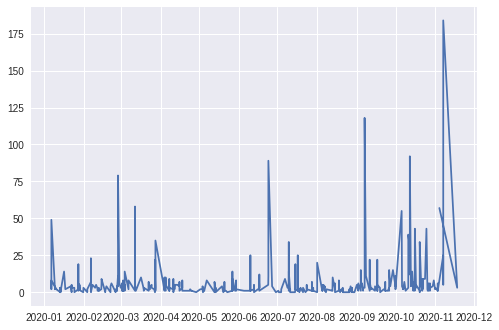

In [23]:
plt.plot(nithya.Timestamp, nithya.Comments)
plt.show;

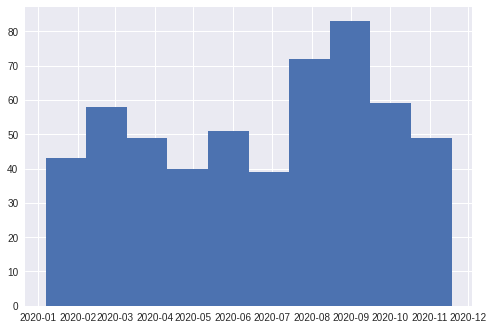

In [24]:
plt.hist(nithya.Timestamp)
plt.show;

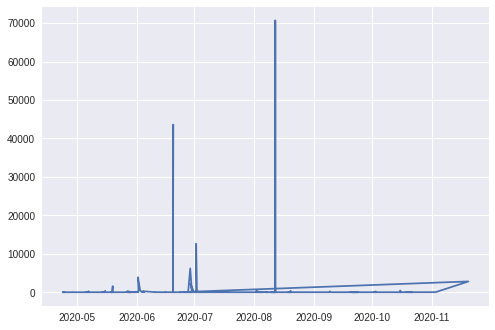

In [25]:
plt.plot(david.Timestamp, david.Comments)
plt.show;

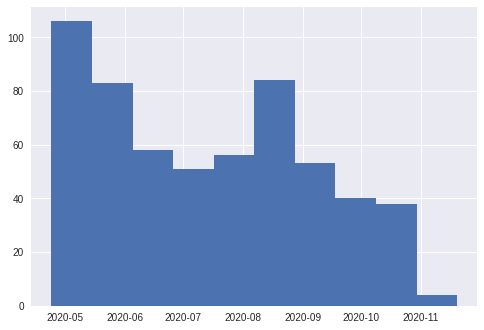

In [26]:
plt.hist(david.Timestamp)
plt.show;

In [27]:
nithya_tr = pd.read_csv('data/nithya_tweets_replies.csv')

In [28]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UserName   1677 non-null   object
 1   Handle     1674 non-null   object
 2   Timestamp  1677 non-null   object
 3   Text       1671 non-null   object
 4   Emojis     111 non-null    object
 5   Comments   1148 non-null   object
 6   Likes      1268 non-null   object
 7   Retweets   1449 non-null   object
dtypes: object(8)
memory usage: 104.9+ KB


In [29]:
nithya_tr.Comments.loc[nithya_tr.Comments.isin(['2.1K','1.4K', '1.1K', '1.7K', '22.3K'])] = [2100, 1400, 1100, 1400, 1100, 1700, 22300]

In [30]:
nithya_tr.Comments.loc[nithya_tr.Comments.isin(['1.3K'])] = [1300, 1300]

In [31]:
nithya_tr.Comments.loc[nithya_tr.Comments.isin(['1K'])]  = [1000]

In [32]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', 
                                          '11.5K', '1.2K',  '1.4K','2.5K', '13.3K', '75.1K', '5.6K',
                                          '2.6K', '16.3K', '308', '355', '532','2.8K', '2.9K', '2K', '1.9K'
                                          ])] = [1500, 1300, 1100, 1000, 2200, 1600, 1500, 1000, 11500, 1200, 1300
                                                , 1500, 1400, 2500, 2500, 2500, 1600, 13300, 75100, 1000, 5600, 2600, 
                                                 16300, 308, 355, 532, 2800, 2900, 2000, 2900, 1900, 2200, 1500,
                                                2500, 2900, 2600, 1300, 1000, 1600, 1900]

In [33]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', 
                                          '11.5K', '1.2K',  '1.4K','2.5K', '13.3K', '75.1K', '5.6K',
                                          '2.6K', '16.3K', '308', '355', '532','2.8K', '2.9K', '2K', '1.9K''3.5K', '7.1K', '7K', '5.5K', '3K', '4.3K', '39.3K','51.8K', '35.9K',
                                          '1.7K', '6.9K', '6.5K', '406', '224', '10.8K','6K', '30.4K', '74.9K', 
                                          '4.5K', '31.6K', '8.7K', '5K', '6.6K', '7.9K', '122.2K', '2.3K',
                                          '4.8K', '2.7K', '6.3K', '9.3K', '55.7K','11.6K'])] = [7100, 7000, 5500,
                                                                                               3000, 4300, 39300,
                                                                                               51800, 35900, 1700,
                                                                                               6900, 6500, 406, 224, 10800, 6000, 30400, 74900, 4500, 31600, 8700, 6500, 
                                                                                                5000, 6600, 7900, 122200, 2300, 4800, 2700, 6300, 9300, 55700, 11600, 3000, 
                                                                                                6000, 7100, 4300]

In [34]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['23K'])] = [23000]

In [35]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['3.5K'])] = [3500, 3500]

In [36]:
nithya_tr.Retweets.loc[nithya_tr.Retweets.isin(['2K', '13K', 
     '1.1K',
       '1.2K', 
       '3.4K',  '2.9K', 
       '2.5K', '5.7K', 
       '1K', '4.1K', '6.2K', '3.7K', 
        '1.8K', 
       '1.9K',  '1.4K',
       ])] = [2000, 13000, 1100, 1200, 3400, 2900, 2500, 5700, 1000, 4100, 6200, 3700, 1200, 1800
             , 1900, 1400, 1000, 1000, 3700, 1200, 1200, 1800, 1000, 1100, 1000, 1000, 1200, 1800, 
             1000, 1000, 1200, 1000, 5700, 1000, 1000, 1400, 1000, 1400, 1400, 1200, 1400, 2500,
             1000, 2500, 1900, 1000, 1000, 1200, 1800, 1100, 1100]
      

In [37]:
nithya_tr.Retweets.loc[nithya_tr.Retweets.isin([ '5K', '1.3K',  '3.1K', '2.7K',  '3.9K', '2.8K', '1.6K', '1.5K',  '3.5K',  '3.8K', '10.9K',
'3.3K',  '2.3K', '2.6K', '7.7K', '5.8K', '52.4K', '4.2K', '4.7K', '51.5K', '149.1K', '26.7K', '11.3K','3.2K', '14.8K',

])] = [5000, 1300, 3100, 1300, 2700, 3900, 2800, 1600, 1300, 1500, 3500, 3800, 10900, 3900, 3300, 2300, 1300
      , 2600, 1500, 7700, 5800, 5800, 52400, 4200, 1500, 4700, 51500, 1300, 149100, 2600, 26700, 11300, 3800, 3200,
      14800, 5000, 3200, 1300, 2300, 1500, 2700, 1500, 1600, 1300, 1500, 1500, 3500, 7700, 2700]

In [38]:
nithya_tr.Retweets.loc[nithya_tr.Retweets.isin([ '1.7K', '8.1K',  '4.5K', '9.6K', '21.6K',  '2.1K', '15.8K','5.3K', '5.5K','13.5K', '32.3K', 
                                                '4.6K', '3K',  '9.8K', '9K', '82K', '116.5K', '2.2K', '99.8K', '6.8K', 
                                                '4.4K', '7.6K', '23.2K', '24.9K','10K', '8.7K', '43.6K', '105.3K', '4.9K', '69.7K', '34.9K', 
                                                '18.8K', '7.5K', '27.6K','9.3K', '209.6K','8.8K', '4.8K', '8.9K', '12.7K','54.1K', '26.4K','17.3K'])] = [1700, 8100, 4500, 9600, 21600, 1700, 
                                                                                                          2100, 1700, 15800, 5300, 5500, 13500, 32300, 4600, 3000, 9800, 9000, 82000, 116500, 
                                                                                                          1700, 2200, 99800, 2200, 6800, 4400, 7600, 23200, 24900, 10000, 8700, 43600, 105300,
                                                                                                          4900, 69700, 34900, 18800, 7500,9300, 27600, 209600, 8800, 4800, 8900, 12700, 
                                                                                                          54100, 26400, 17300]

In [39]:
nithya_tr['Comments'].fillna(0, inplace=True)
nithya_tr['Likes'].fillna(0, inplace=True)
nithya_tr['Retweets'].fillna(0, inplace=True)
nithya_tr.Emojis.fillna('', inplace=True)
nithya_tr.Text.fillna('', inplace=True)

In [40]:
nithya_tr = nithya_tr.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [46]:
nithya_tr = nithya_tr.drop([998,1012,1122])

In [41]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1677 non-null   object        
 1   Handle     1674 non-null   object        
 2   Timestamp  1677 non-null   datetime64[ns]
 3   Text       1677 non-null   object        
 4   Emojis     1677 non-null   object        
 5   Comments   1677 non-null   float64       
 6   Likes      1677 non-null   int32         
 7   Retweets   1677 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 91.8+ KB


In [47]:
david_tr = pd.read_csv('data/david_tweets_replies.csv')

In [48]:
david_tr.Comments.loc[david_tr.Comments.isin(['28.2K', '12.6K', '6.2K',
       '43.8K', '3.9K', '1.1K', '1K',  '3.8K', '3.3K', '19.9K'])] = [28200, 12600, 6200, 43800, 3900, 1100, 1000, 3800, 3300, 19900]

In [49]:
david_tr.Likes.loc[david_tr.Likes.isin(['29.6K','7.7K', '4.8K','1.3K',
       '1K', '24.2K', 
       '22.2K', '44.4K',  '47.2K', '3.3K','1.2K', '2K',  '3.1K',
       '1.6K', '21K', '2.5K',  '5.1K', '11.5K',
       '5.3K', '4.3K', '12.6K',
       '80.8K', '1.1K', '130.6K'])] = [29600, 7700, 4800, 1300, 1000, 24200, 22200, 44400, 47200, 3300, 1200, 2000, 3100, 1600, 21000, 2500, 5100, 11500, 5300, 4300, 12600, 80800, 1100, 130600, 2000]

In [50]:
david_tr.Retweets.loc[david_tr.Retweets.isin(['52.7K', '5.2K', '1.2K',
       '26K', '6K', '1.1K', '113.4K', '58.1K', '2.9K', '150.5K', '219K', 
        '12.4K', '1.3K', '6.3K', '1.8K', '11K', 
       '10.2K', '103.1K', '4.6K','1.5K',  '2K', '2.1K',
       '3.1K',  '25.3K',  '36.4K',
        '1K', '6.8K', '46.9K', '261.1K', '15.4K', '2.3K', '2.5K',
       '572.5K',  '4.2K'])]  = [52700, 5200, 1200, 26000, 6000, 1100, 1100, 113400, 58100, 2900, 150500,
                              219000, 12400, 1300, 6300, 1800, 2900, 11000, 10200, 103100, 4600, 1500,
                              1100, 2000, 2100, 3100, 25300, 36400, 1000, 11000, 6800, 46900, 261100,
                               15400, 2300, 2500, 572500, 4200, 1000]

In [51]:
david_tr.Retweets.loc[david_tr.Retweets.isin(['2.2K'])] = [2200, 2200]

In [52]:
david_tr['Comments'].fillna(0, inplace=True)
david_tr['Likes'].fillna(0, inplace=True)
david_tr['Retweets'].fillna(0, inplace=True)
david_tr.Emojis.fillna('', inplace=True)
david_tr.Text.fillna('', inplace=True)

In [53]:
david_tr = david_tr.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [54]:
david_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   2263 non-null   object        
 1   Handle     2263 non-null   object        
 2   Timestamp  2263 non-null   datetime64[ns]
 3   Text       2263 non-null   object        
 4   Emojis     2263 non-null   object        
 5   Comments   2263 non-null   float64       
 6   Likes      2263 non-null   int32         
 7   Retweets   2263 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 123.9+ KB


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([17741.95883102, 17742.33177388, 17742.70471673, ...,
        18585.1826328 , 18585.55557566, 18585.92851852]),
 <BarContainer object of 2263 artists>)

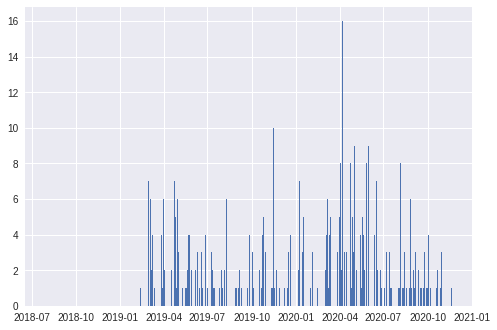

In [55]:
plt.hist(david_tr.Timestamp, david_tr.Timestamp.count())

(array([3., 2., 1., ..., 0., 0., 1.]),
 array([15245.84481481, 15247.83889768, 15249.83298055, ...,
        18579.9513713 , 18581.94545417, 18583.93953704]),
 <BarContainer object of 1674 artists>)

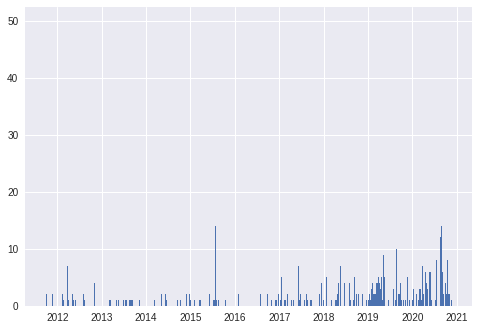

In [56]:
plt.hist(nithya_tr.Timestamp, nithya_tr.Timestamp.count())

In [57]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1674 non-null   object        
 1   Handle     1674 non-null   object        
 2   Timestamp  1674 non-null   datetime64[ns]
 3   Text       1674 non-null   object        
 4   Emojis     1674 non-null   object        
 5   Comments   1674 non-null   float64       
 6   Likes      1674 non-null   int32         
 7   Retweets   1674 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 104.6+ KB


In [58]:
old_nithya = pd.read_csv('data/pre2019_nithya.csv')

In [59]:
old_nithya['Comments'].fillna(0, inplace=True)
old_nithya['Likes'].fillna(0, inplace=True)
old_nithya['Retweets'].fillna(0, inplace=True)
old_nithya.Emojis.fillna('', inplace=True)
old_nithya.Text.fillna('', inplace=True)

In [60]:
old_nithya.Retweets.loc[old_nithya.Retweets.isin(['1K', '13K', '2K', '1.1K','1.2K', 
                                                  '3.4K','2.5K', '5.7K', '4.1K', '6.1K', 
                                                  '1.8K', '1.9K', '2.4K',
       '3.1K', '1.3K', '896', '390', '2.7K', '10K', '1.5K', 
        '3.8K', '2.3K', '22K', '3.3K'])] = [1000, 13000, 2000, 2000, 1100, 1200, 3400, 2500, 5700
                                           , 1000, 4100, 6100, 1200, 1800, 1900, 2400, 3100, 1300, 896, 
                                           2500, 390, 2700, 10000, 1200, 1100, 1000, 1500, 1200, 3800, 
                                            1000, 1200, 2300, 2400, 22000, 33000, 2700, 1800]

/home/mario/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
old_nithya.Retweets.loc[old_nithya.Retweets.isin(['1.6K'])] = [1600]

In [62]:
old_nithya.Likes.loc[old_nithya.Likes.isin(['1.5K', '1.3K', '1.1K', '5.7K', '3K'])] = [1500, 1300, 1100, 1500, 5700, 3000]


In [63]:
old_nithya = old_nithya.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [64]:
old_nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1191 non-null   object        
 1   Handle     1191 non-null   object        
 2   Timestamp  1191 non-null   datetime64[ns]
 3   Text       1191 non-null   object        
 4   Emojis     1191 non-null   object        
 5   Comments   1191 non-null   float64       
 6   Likes      1191 non-null   int32         
 7   Retweets   1191 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 65.3+ KB


In [65]:
old_david = pd.read_csv('data/pre2019_david.csv')

In [66]:
old_david.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   3408 non-null   object 
 1   Handle     3408 non-null   object 
 2   Timestamp  3408 non-null   object 
 3   Text       3407 non-null   object 
 4   Emojis     477 non-null    object 
 5   Comments   1253 non-null   float64
 6   Likes      2129 non-null   object 
 7   Retweets   2884 non-null   object 
dtypes: float64(1), object(7)
memory usage: 213.1+ KB


In [67]:
old_david['Comments'].fillna(0, inplace=True)
old_david['Likes'].fillna(0, inplace=True)
old_david['Retweets'].fillna(0, inplace=True)
old_david.Emojis.fillna('', inplace=True)
old_david.Text.fillna('', inplace=True)

In [68]:
old_david.Likes.loc[old_david.Likes.isin(['1.5K',
       '1.6K'])] = [1500, 1600]

In [69]:
old_david.Retweets.loc[old_david.Retweets.isin(['1.2K', '1.9K','2.2K'])] = [1200, 1900, 2200]

In [70]:
old_david = old_david.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [71]:
old_david.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   3408 non-null   object        
 1   Handle     3408 non-null   object        
 2   Timestamp  3408 non-null   datetime64[ns]
 3   Text       3408 non-null   object        
 4   Emojis     3408 non-null   object        
 5   Comments   3408 non-null   float64       
 6   Likes      3408 non-null   int32         
 7   Retweets   3408 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 186.5+ KB


In [72]:
nithya = pd.concat([nithya, nithya_tr, old_nithya])

In [73]:
david = pd.concat([david, david_tr, old_david])

In [74]:
david.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6244 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   6244 non-null   object        
 1   Handle     6244 non-null   object        
 2   Timestamp  6244 non-null   datetime64[ns]
 3   Text       6244 non-null   object        
 4   Emojis     6244 non-null   object        
 5   Comments   6244 non-null   float64       
 6   Likes      6244 non-null   int32         
 7   Retweets   6244 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 390.2+ KB


In [75]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3408 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   3408 non-null   object        
 1   Handle     3408 non-null   object        
 2   Timestamp  3408 non-null   datetime64[ns]
 3   Text       3408 non-null   object        
 4   Emojis     3408 non-null   object        
 5   Comments   3408 non-null   float64       
 6   Likes      3408 non-null   int32         
 7   Retweets   3408 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 213.0+ KB


In [76]:
cands = pd.concat([david, nithya])

In [77]:
cands.Handle.value_counts()

@davideryu         5378
@nithyavraman      2845
@MayorOfLA           67
@LosFelizLedger      36
@LACity              34
                   ... 
@SilverLakeNC         1
@SundarrajanG         1
@FrankLuntz           1
@FredTJoseph          1
@liuba4congress       1
Name: Handle, Length: 685, dtype: int64

In [78]:
cands = cands.loc[cands.Handle.isin(['@davideryu', '@nithyavraman'])]

In [189]:
# cands['is_david'] = np.where(cands.Handle.isin(['@davideryu']), 1, 0)

In [79]:
cands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8223 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   8223 non-null   object        
 1   Handle     8223 non-null   object        
 2   Timestamp  8223 non-null   datetime64[ns]
 3   Text       8223 non-null   object        
 4   Emojis     8223 non-null   object        
 5   Comments   8223 non-null   float64       
 6   Likes      8223 non-null   int32         
 7   Retweets   8223 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 513.9+ KB


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [143]:
cust_stop = {'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than', 'bit', 'ly', 'ow', 'http', 'https', 'com'} 

In [144]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words=cust_stop, max_df=.7,
                             analyzer='word', max_features=1000, ngram_range=(1,2))

X_train, X_test, y_train, y_test = train_test_split(cands.Text, cands.Handle, stratify=cands.Handle)

In [145]:
count_vect.fit(X_train)

CountVectorizer(max_df=0.7, max_features=1000, ngram_range=(1, 2),
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
                            'be', 'because', 'been', 'before', 'being', 'below',
                            'between', 'bit', 'both', 'but', 'by', 'can', 'com',
                            'did', 'do', 'does', ...})

In [146]:
X_train_counts = count_vect.transform(X_train)
print("The type of X_train_counts is {0}.".format(type(X_train_counts)))
print("The X matrix has {0} rows (documents) and {1} columns (words).".format(
        X_train_counts.shape[0], X_train_counts.shape[1]))



The type of X_train_counts is <class 'scipy.sparse.csr.csr_matrix'>.
The X matrix has 6167 rows (documents) and 1000 columns (words).


In [147]:


tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)



In [148]:
pd.DataFrame(X_train_tfidf.todense(), columns = count_vect.vocabulary_).head()

,culture,around,la,city,hall,government,large,recent,stories,tell,...,street vendors,bank,oil,wells,creating,august,streetart,councilmembers,passed,man
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.207021,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.202767,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:


nb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
nb_model.fit(X_train_tfidf, y_train)



MultinomialNB()

In [150]:
nb_model.classes_[0]

'@davideryu'

In [151]:
feature_words = count_vect.get_feature_names()
n = 50 #number of top words associated with the category that we wish to see

for handle in range(len(nb_model.classes_)):
    print(f"\nTarget: {handle}, name: {nb_model.classes_[handle]}")
    log_prob = nb_model.feature_log_prob_[handle]
    i_topn = np.argsort(log_prob)[::-1][:n]
    features_topn = [feature_words[i] for i in i_topn]
    print(f"Top {n} tokens: ", features_topn)




Target: 0, name: @davideryu
Top 50 tokens:  ['org', 'la', 'lacd4', 'city', 'join', 'today', 'lacity', 'thank', 'los', 'community', 'angeles', 'los angeles', 'new', 'lacity org', 'work', 'great', 'get', 'day', 'help', 'need', 'us', 'replying', 'free', 'hollywood', 'cd4', 'info', 'learn', 'thanks', 'support', 'park', 'housing', 'make', 'time', 'council', 'food', 'davidryu', 'others', 'program', 'davidryu lacity', 'year', 'rent', 'local', 'working', 'one', 'first', 'see', 'homelessness', 'lacorps', 'proud', 'happy']

Target: 1, name: @nithyavraman
Top 50 tokens:  ['replying', 'la', 'city', 'people', 're', 'us', 'much', 'housing', 'thread', 'homeless', 'thank', 'one', 'many', 've', 'campaign', 'nithyaforthecity', 'need', 'like', 'make', 'homelessness', 'council', 'could', 'would', 'get', 'new', 'money', 'even', 'nithya', 'time', 'help', 'also', 'support', 'residents', 'right', 'services', 'want', 'show', 'let', 'public', 'work', 'city council', 'know', 'los', 'love', '000', 'org', 'policy

In [152]:
from sklearn.pipeline import Pipeline
nb_pipeline = Pipeline([('vect', CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_features=1000)),
                        ('tfidf', TfidfTransformer(use_idf=True)),
                        ('model', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),
                        ])
nb_pipeline.fit(X_train, y_train);

In [153]:

predicted = nb_pipeline.predict(X_test)
accuracy = np.mean(predicted == y_test)

print("\nThe accuracy on the test set is {0:0.3f}.".format(accuracy))


The accuracy on the test set is 0.889.


In [154]:
X_test[predicted != y_test]

1412    Replying to \n@problemwthatAlso I am not sure ...
211     WOW. Our volunteers continue to amaze me: they...
360     COVID-19 has wiped out incomes for so many— pa...
334     And it must be rooted out.Emily Alpert Reyes\n...
934     @MitchOFarrell\n @josehuizarKerry Morrison\n@k...
                              ...                        
362     Undocumented and mixed-status families are bea...
710     Another max Ryu donor is DART Container, a sin...
628     If there was a test kit for every racist tweet...
522     We've got dozens of volunteers canvassing in L...
1538    The first "slum-free city" plan that involves ...
Name: Text, Length: 228, dtype: object

In [155]:
y_test[predicted != y_test]

1412    @nithyavraman
211     @nithyavraman
360     @nithyavraman
334        @davideryu
934     @nithyavraman
            ...      
362     @nithyavraman
710     @nithyavraman
628        @davideryu
522     @nithyavraman
1538    @nithyavraman
Name: Handle, Length: 228, dtype: object

In [156]:
tf = CountVectorizer(lowercase=True, tokenizer=None, stop_words=cust_stop,
                             analyzer='word', max_features=5000)  # Check out the options!

document_tf_matrix = tf.fit_transform(X_train).todense()

pd.DataFrame(document_tf_matrix, columns = sorted(tf.vocabulary_))

,00,000,01,02,03,04,05,06,07,08,...,zone,zones,zoning,zoo,zoom,ángeles,내용은,많은,바랍니다,센서스
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()  # Checkout out the options!

document_tfidf_matrix = tfidf.fit_transform(X_train)

tfidf_df = pd.DataFrame(document_tfidf_matrix.todense(), columns = sorted(tfidf.vocabulary_))
tfidf_df

,00,000,0001,0002,0044,00am,00pm,01,0147,0147_mot_07,...,커뮤니티에게,코로나,통행,하실,한가위,한국계,한인,합니다,혹은,확인하실길
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=1)

In [159]:
# cross val score/ predict
count_vect_score = cross_val_score(lr, X_train_counts, y_train, cv=5)

count_vect_score.mean()

0.9044939212183589

In [160]:

tf_vect_score = cross_val_score(lr, document_tfidf_matrix, y_train, cv=5)

tf_vect_score.mean()

0.9093547119266103

In [120]:
def count_vec_ngram(params, X_train, y_train):
    cvec_p = CountVectorizer(ngram_range=(params))
    cvec_p.fit(X_train)
    X_train_cvec_p = cvec_p.transform(X_train)
    count_vect_score = cross_val_score(lr, X_train_cvec_p, y_train, cv=5)
    return count_vect_score.mean()

params = [(1,1), (1,2), (1,3), (1,4)] 

ngram_scores = []

for p in params:
    ngram_scores.append(count_vec_ngram(p, X_train, y_train))

ngram_scores


# ngrams = ['cvec gram_1','cvec gram_2','cvec gram_3','cvec gram_4']
# ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])

# sns.pointplot(x='params', y='scores', data = ngram_df)
# plt.ylabel('Accuracy Score')
# plt.xlabel('ngrams')
# plt.xticks(rotation=40)
# plt.show()

/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.9414644020921157,
 0.9453552429738117,
 0.9416260823044293,
 0.9382208078489829]

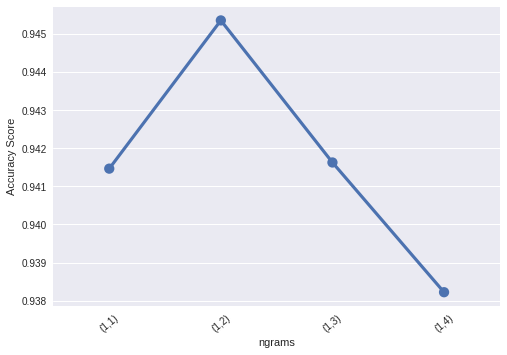

In [121]:
sns.pointplot(x=['(1,1)', '(1,2)', '(1,3)', '(1,4)'], y=ngram_scores)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()

In [206]:

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################


print("%d documents" % len(cands.Text))
print("%d categories" % len(cands.Handle.unique()))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (1000, 2000, 3000, 5000),
    'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),  # unigrams or bigrams
    'vect__stop_words': ('english', cust_stop),
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

# multiprocessing requires the fork to happen in a __main__ protected
# block

# find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(cands.Text, cands.Handle)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

8223 documents
2 categories

pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (1000, 2000, 3000, 5000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),
 'vect__stop_words': ('english',
                      {'a',
                       'about',
                       'above',
                       'after',
                       'again',
                       'against',
                       'all',
                       'am',
                       'an',
                       'and',
                       'any',
                       'are',
                       'as',
                       'at',
                       'be',
                       'because',
                       'been',
                       'before',
                       'being',
                       'below',
                       'between',
             

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.8min finished


done in 107.574s

Best score: 0.951
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'l2'
	vect__max_df: 0.75
	vect__max_features: 5000
	vect__ngram_range: (1, 1)
	vect__stop_words: {'with', 'do', 'they', 'if', 'him', 'against', 'of', 'their', 'same', 'through', 'again', 'until', 'myself', 'will', 'it', 'any', 'doing', 'into', 'an', 'themselves', 'only', 'below', 'where', 'both', 'but', 'most', 'are', 'between', 'https', 'at', 'after', 'that', 'under', 'have', 'during', 'yourself', 'ours', 'out', 'to', 'off', 'more', 'being', 'can', 'http', 'other', 'there', 'this', 'was', 'be', 'has', 'com', 'and', 'my', 'before', 'his', 'your', 'been', 'or', 'yourselves', 'its', 'over', 'further', 'nor', 'all', 'herself', 'just', 'ourselves', 'should', 'for', 'i', 'above', 'me', 'so', 'am', 'too', 'does', 'each', 'down', 'is', 'himself', 'by', 'yours', 'don', 'the', 'some', 'a', 'hers', 't', 'these', 'from', 'than', 'having', 'then', 'while', 'her', 'here', 'why', 'once', 'th

In [124]:
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


In [198]:
vectorizer = TfidfVectorizer(stop_words=cust_stop, max_df=.7, max_features=3000, ngram_range=(1,2))
X = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()

features

['00',
 '000',
 '000 people',
 '000 street',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '10 000',
 '100',
 '100 renewable',
 '10am',
 '10k',
 '11',
 '11am',
 '12',
 '12pm',
 '12th',
 '13',
 '14',
 '15',
 '15th',
 '16',
 '17',
 '18',
 '19',
 '19 emergency',
 '1pm',
 '1st',
 '20',
 '20 years',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2020census',
 '21',
 '213',
 '213 473',
 '22',
 '22 3a',
 '23',
 '24',
 '25',
 '26',
 '27',
 '27th',
 '28',
 '29',
 '29th',
 '2c',
 '2nd',
 '2pm',
 '30',
 '30 pm',
 '30 years',
 '300',
 '30am',
 '30pm',
 '30th',
 '31',
 '311',
 '323',
 '35',
 '3a',
 '3pm',
 '3rd',
 '40',
 '405',
 '41',
 '473',
 '48',
 '4pm',
 '4th',
 '50',
 '500',
 '5k',
 '5pm',
 '5th',
 '60',
 '600',
 '6pm',
 '6th',
 '7004',
 '7pm',
 '7th',
 '80',
 '800',
 '8am',
 '8pm',
 '8th',
 '90',
 '9am',
 '9th',
 'aapi',
 'aapi community',
 'aapi hate',
 'aapiheroes',
 'ability',
 'able',
 'absolutely',
 'abuse',
 'academy',
 'accep

In [199]:
kmeans = KMeans()
kmeans.fit(X)

KMeans()

In [200]:
# Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("Top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}. {', '.join(features[i] for i in centroid)}")

Top features (words) for each cluster:
0. la, today, replying, re, us, new, support, time, people, need
1. los angeles, angeles, los, city, la, city los, org, county, join, jewish
2. thank, lacorps, lacd4, clean, cleanscene, work, thank lacorps, thank much, keeping, thanks
3. join, park, lacd4, community, hollywood, griffith, griffith park, info, free, art
4. housing, homeless, homelessness, people, rent, need, services, la, crisis, affordable
5. replying, much, thank, thanks, know, tell, support, work, kind, love
6. lacity, lacity org, org, davidryu, davidryu lacity, cd4 issues, issues lacity, cd4, issues, release
7. city, la, council, city council, city hall, hall, la city, us, nithya, nithyaforthecity


In [201]:
print("random sample of tweets in each cluster")
assigned_cluster = kmeans.transform(X).argmin(axis=1)

for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_tweets = np.random.choice(cluster, 3, replace=False)
    
    print(f"cluster {i}:")
    for tweet in sample_tweets:
        print(f"{cands[['Handle']].iloc[tweet]}" + '\n' +  f"{cands[['Text']].iloc[tweet]}" + '\n')

random sample of tweets in each cluster
cluster 0:
Handle    @davideryu
Name: 347, dtype: object
Text    Getting groceries & necessities is especially ...
Name: 347, dtype: object

Handle    @nithyavraman
Name: 104, dtype: object
Text    LA must mobilize to fight climate change quick...
Name: 104, dtype: object

Handle    @davideryu
Name: 1234, dtype: object
Text    Free Shakespeare is coming back to Griffith Pa...
Name: 1234, dtype: object

cluster 1:
Handle    @davideryu
Name: 522, dtype: object
Text    The \n@KAFLosAngeles\n have been fierce advoca...
Name: 522, dtype: object

Handle    @davideryu
Name: 3149, dtype: object
Text    Great way to wrap up #APAHM. Special thanks to...
Name: 3149, dtype: object

Handle    @davideryu
Name: 577, dtype: object
Text    If you're looking for coffee or some delicious...
Name: 577, dtype: object

cluster 2:
Handle    @davideryu
Name: 3248, dtype: object
Text    Thank you \n@LAFD\n for keeping our neighborho...
Name: 3248, dtype: object

Handle  

In [202]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = cands.iloc[cluster].dropna()
    most_common = Counter(topics.Handle).most_common()

    print(f"Cluster {i}:")
    for j in range (len(most_common)):
        print(f"     {most_common[j]}")

Cluster 0:
     ('@davideryu', 2355)
     ('@nithyavraman', 347)
Cluster 1:
     ('@davideryu', 416)
     ('@nithyavraman', 53)
Cluster 2:
     ('@davideryu', 277)
     ('@nithyavraman', 32)
Cluster 3:
     ('@davideryu', 755)
     ('@nithyavraman', 132)
Cluster 4:
     ('@davideryu', 564)
     ('@nithyavraman', 62)
Cluster 5:
     ('@davideryu', 145)
     ('@nithyavraman', 29)
Cluster 6:
     ('@davideryu', 301)
     ('@nithyavraman', 47)
Cluster 7:
     ('@davideryu', 563)
     ('@nithyavraman', 89)


In [179]:
string = []
for t in cands.Text:
    if t not in cust_stop:
        string.append(t)
string = pd.Series(string).str.cat(sep=' ')


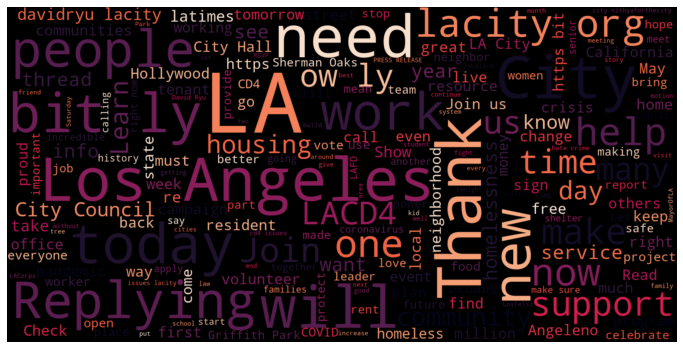

In [180]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='rocket').generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [174]:
cvec = CountVectorizer(stop_words=cust_stop)

cvec.fit(cands.Text)

nithya_doc_matrix = cvec.transform(cands[cands.Handle == '@nithyavraman'].Text)
david_doc_matrix = cvec.transform(cands[cands.Handle == '@davideryu'].Text)
nithya_tf = np.sum(nithya_doc_matrix,axis=0)
david_tf = np.sum(david_doc_matrix,axis=0)
nith = np.squeeze(np.asarray(nithya_tf))
dav = np.squeeze(np.asarray(david_tf))
term_freq_df = pd.DataFrame([nith,dav],columns=cvec.get_feature_names()).transpose()

In [175]:
term_freq_df['total'] = term_freq_df.sum(axis=1)

In [176]:
term_freq_df

,0,1,total
00,3,12,15
000,139,87,226
0001,0,2,2
0002,0,2,2
002,0,1,1
...,...,...,...
한인,0,3,3
합니다,0,2,2
해를,0,1,1
혹은,0,2,2


In [ ]:
'''

How cleaning text affects frequency distribution shown in contrast to expected zipf

'''

Text(0.5, 1.0, 'Top 300 tokens in tweets')

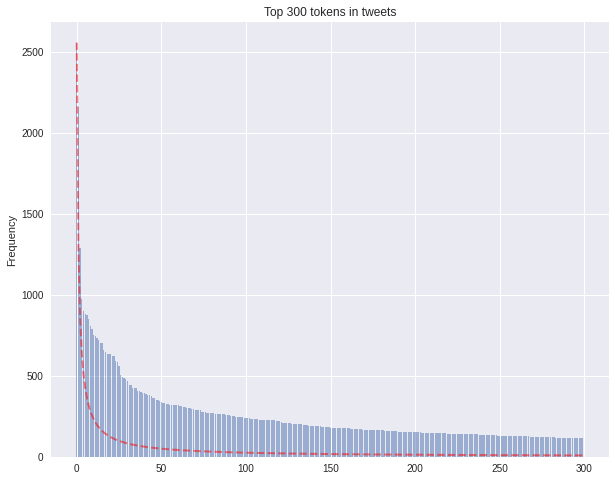

In [177]:
y_pos = np.arange(300)
plt.figure(figsize=(10,8))

expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1) for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 tokens in tweets')

In [178]:
term_freq_df.sort_values(by='total', ascending=False)['total'][:300]

la          2556
city        2157
org         1290
los          972
people       901
            ... 
continue     114
taking       113
heat         113
joined       113
lot          113
Name: total, Length: 300, dtype: int64

In [ ]:
'''

https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-3-zipfs-law-data-visualisation-fc9eadda71e7

'''

In [182]:
'''

Accuracy driven models overpredict majorty class! From lecture on 11/5 afternoon

Stratifying

Change point weighting

ROC curve and AUC

Live import new tweets to Amazon S3, use that for SGD model training

Neural network? See notes on CNN with soft cluster output (study hall)

TensorFlow or Keras

Time series

Random Forest

'''

'\n\nAccuracy driven models overpredict majorty class! From lecture on 11/5 afternoon\n\nStratifying\n\nChange point weighting\n\n\n'

In [184]:


# see a 2d representation of the data using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [185]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

In [193]:
X_scaled = scaler.fit_transform(tfidf_df) # standardize data

pca = PCA() 
X_pca = pca.fit_transform(X_scaled) 

In [195]:
X_pca.shape

(6167, 6167)

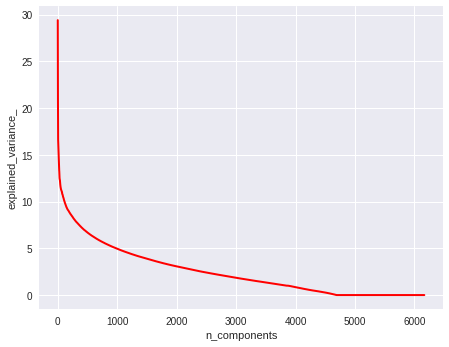

In [196]:

pca.fit(X_scaled)

# plot explained variance ratio in a scree plot
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2, color='red')
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_');



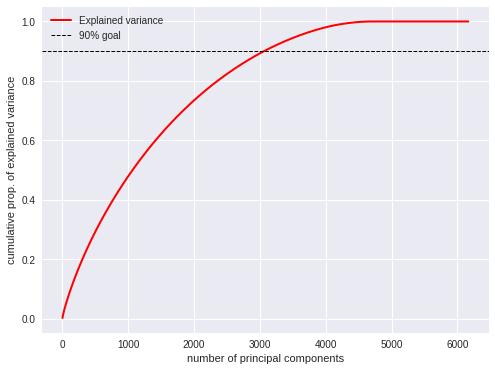

In [197]:


total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();



In [207]:
'''

Cosine similarity over time

'''

'\n\nCosine similarity over time\n\n'

In [208]:
from sklearn.metrics.pairwise import cosine_similarity



X_train, X_test, y_train, y_test = train_test_split(cands.Text, cands.Handle, stratify=cands.Handle)

In [390]:
tfidf = TfidfVectorizer(strip_accents='ascii', stop_words=cust_stop, max_features=50)  # Checkout out the options!

document_tfidf_matrix = tfidf.fit_transform(X_train)

tfidf_df = pd.DataFrame(document_tfidf_matrix.todense(), columns = sorted(tfidf.vocabulary_))
tfidf_df

,19,angeles,california,city,community,council,day,food,free,get,...,replying,support,thank,thread,time,today,us,work,would,year
0,0.0,0.000000,0.0,0.247015,0.000000,0.000000,0.000000,0.0,0.000000,0.328313,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.393338
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.890665,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.475138,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.388174,0.000000,0.000000,0.585029,0.0,0.000000,0.000000,...,0.0,0.000000,0.518938,0.0,0.0,0.487612,0.00000,0.0,0.0,0.000000
4,0.0,0.379594,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.38688,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.588833,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
6163,0.0,0.000000,0.0,0.000000,0.337501,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.325506,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
6164,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
6165,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.282155,0.0,0.000000,0.000000,...,0.0,0.274937,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000


In [223]:
# Calculate Distance of TF-IDF Vectors
dist_matrix = cosine_similarity(tfidf_df)

# Turn it into a DataFrame
dist_df = pd.DataFrame(dist_matrix)

dist_df

,0,1,2,3,4,5,6,7,8,9,...,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166
0,1.000000,0.444815,0.0,0.095885,0.236233,0.0,0.200722,0.156688,0.188654,0.035348,...,0.000000,0.00000,0.153893,0.247015,0.066478,0.195087,0.185709,0.222093,0.000000,0.000000
1,0.444815,1.000000,0.0,0.000000,0.000000,0.0,0.544530,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301253,0.000000,0.000000
2,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.091988,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.095885,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.298285,0.143198,...,0.000000,0.00000,0.095067,0.388174,0.104467,0.000000,0.168917,0.000000,0.165069,0.331676
4,0.236233,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.245727,0.129984,0.104769,...,0.247261,0.00000,0.410387,0.000000,0.269607,0.000000,0.224653,0.343298,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0.195087,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.302237,0.000000,0.000000,...,0.000000,0.00000,0.211782,0.000000,0.000000,1.000000,0.000000,0.000000,0.161892,0.000000
6163,0.185709,0.000000,0.0,0.168917,0.224653,0.0,0.331479,0.000000,0.103571,0.000000,...,0.251477,0.30741,0.257639,0.000000,0.140475,0.000000,1.000000,0.000000,0.000000,0.000000
6164,0.222093,0.301253,0.0,0.000000,0.343298,0.0,0.000000,0.401537,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
6165,0.000000,0.000000,0.0,0.165069,0.000000,0.0,0.000000,0.141120,0.000000,0.000000,...,0.000000,0.00000,0.098885,0.000000,0.000000,0.161892,0.000000,0.000000,1.000000,0.159964


In [ ]:
'''

biplots over time showing aggregate grouping, are PCs ordered by importance?

'''

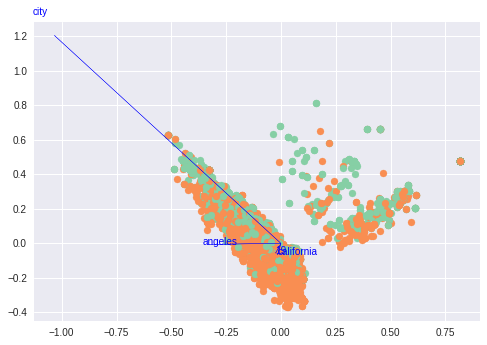

In [430]:
dat = tfidf_df

n = len(dat.columns)

pca = PCA(n_components = 30)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(dat)



## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,1]


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*3*max(xs), yvector[i]*3*max(ys),
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*3.3, yvector[i]*max(ys)*3.3,
             list(dat.columns.values)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs[i], ys[i], color = clr[i])
#     plt.text(xs[i]*1.1, ys[i]*1.1, list(dat.index)[i], color='b')

plt.show()

In [431]:
pca.explained_variance_

array([0.04634191, 0.03977816, 0.03337373, 0.03199047, 0.03057762,
       0.02849034, 0.02743731, 0.02425199, 0.02380476, 0.02221266,
       0.02121769, 0.0207419 , 0.01995459, 0.01866487, 0.01846008,
       0.0183111 , 0.01760619, 0.01712906, 0.01648151, 0.01622513,
       0.01601368, 0.0157276 , 0.01532463, 0.01504793, 0.0148958 ,
       0.01454732, 0.01421423, 0.01386746, 0.01378623, 0.01338647])

In [432]:
dat.columns.values

array(['19', 'angeles', 'california', 'city', 'community', 'council',
       'day', 'food', 'free', 'get', 'great', 'hall', 'help', 'hollywood',
       'homeless', 'homelessness', 'housing', 'info', 'join', 'know',
       'la', 'lacd4', 'lacity', 'latimes', 'learn', 'like', 'local',
       'los', 'make', 'many', 'need', 'new', 'one', 'org', 'park',
       'people', 'program', 'public', 're', 'rent', 'replying', 'support',
       'thank', 'thread', 'time', 'today', 'us', 'work', 'would', 'year'],
      dtype=object)

In [322]:
clr = cmap(norm(z))

In [327]:
max(ys)

0.6593986177339152

In [377]:
pca.components_.shape

(30, 50)

,also,angeles,california,campaign,city,could,council,crisis,even,get,...,support,thank,thread,time,today,us,want,work,workers,would
0,0.0,0.0,0.0,0.748697,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.449464,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.498279,0.315439,0.0,0.000000,0.0,0.0,0.000000,...,0.534492,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.406197,0.0,0.593992,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.392418,0.0,0.000000,0.0,0.0,0.296657,...,0.000000,0.340841,0.0,0.0,0.0,0.000000,0.339747,0.622169,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3404,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3405,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3406,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.588870,0.000000,0.000000,0.0,0.0


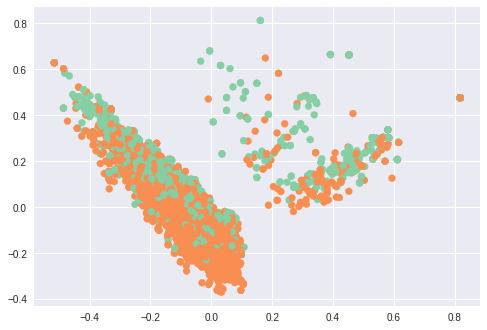

In [315]:
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)
plt.scatter(xs,ys, c = cmap(norm(z)))


# Nithya is green, david is orange

In [340]:
from sklearn.decomposition import NMF

In [343]:
def top_tokens_nmf(H, tokens, num_tokens, from_sk=True, print_=False):
    H_top_idx = H.argsort()[:,-1:-(num_tokens+1):-1]
    top_tokens = np.full((10,num_tokens), 'Temp String', dtype='object')
    for topic, row in enumerate(H_top_idx):
        if from_sk:
            top_tokens[topic,:] = tokens[row].tolist()
        else:
            top_tokens[topic,:] = tokens[row][0].tolist()
        if print_:
            print(f'Topic {topic+1}:')
            print(f"{', '.join([token for token in top_tokens[topic,:]])}\n")
    return top_tokens

In [351]:
tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

all_X = tf_vectorizer.fit_transform(cands.Text).todense()

tokens = np.array(tf_vectorizer.get_feature_names())

In [336]:
nmf = NMF(n_components=10, init='random')
nmf.fit(X)

NMF(init='random', n_components=10)

In [360]:
tokens

(5000,)

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train_tfidf)
# Xtemp=scaler.transform(X_train_tfidf)    
# pca = PCA(n_components=1000)
# x_new = pca.fit_transform(Xtemp)

# def myplot(score,coeff,labels=None):
#     xs = score[:,0]
#     ys = score[:,1]
#     n = coeff.shape[0]
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
#     plt.scatter(xs * scalex,ys * scaley, c = y)
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
#         if labels is None:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
#         else:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
#     plt.xlabel("PC{}".format(1))
#     plt.ylabel("PC{}".format(2))
#     plt.grid()

#Call the function. Use only the 2 PCs.

# myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
# plt.show()

In [369]:
np.transpose(pca.components_[0,1])

-0.056494490382553664

In [365]:
xvector

array([-0.00226151, -0.05649449, -0.0265672 , -0.04309391, -0.25290951,
       -0.01311341, -0.09672075, -0.02163296,  0.0091806 , -0.02810463,
       -0.03960689, -0.0277941 , -0.04587503, -0.02788627, -0.19124922,
       -0.03984894, -0.0078683 , -0.06068393, -0.03862198, -0.02751611,
       -0.02974381,  0.01014925, -0.03044805, -0.04746109, -0.0633555 ,
       -0.06224306,  0.0151785 , -0.02936466, -0.05647714, -0.07503305,
       -0.02471011, -0.02170693, -0.00365982, -0.02374283,  0.9076153 ,
       -0.03123266, -0.01999046, -0.00872558, -0.0434324 , -0.02669701,
       -0.0085481 ,  0.02247305, -0.08459601, -0.0102656 , -0.03689334,
       -0.08903751, -0.02376085, -0.02595894, -0.0143947 ,  0.00322042])

In [ ]:
'''

https://github.com/dr-rodriguez/The-Divided-States-of-America/blob/master/analysis.py

http://strakul.blogspot.com/2016/07/data-science-principal-component.html

https://www.mwbrady.com/post/textasvectors/

https://towardsdatascience.com/introduction-to-text-representation-and-similarity-b5dd3fd71737

'''

In [370]:
def make_biplot(self, xval=0, yval=1, max_arrow=0.2, save=False, alpha=0.4, use_sns=False):
        """
        Create a biplot of the PCA components
        :param xval: PCA component for the x-axis
        :param yval: PCA component for the y-axis
        :param max_arrow: Scaling to control how many arrows are plotted
        :param save: Filename or False if no save needed
        :param alpha: Transparency
        :return:
        """

        # Check if pca has been run
        if self.pcscores is None:
            print('Run PCA first')
            return

        n = self.loadings.shape[1]
        scalex = 1.0 / (self.pcscores.iloc[:, xval].max() - self.pcscores.iloc[:, xval].min())  # Rescaling to be from -1 to +1
        scaley = 1.0 / (self.pcscores.iloc[:, yval].max() - self.pcscores.iloc[:, yval].min())

        if use_sns:
            # Use seaborn
            cut = 120
            g = sns.JointGrid(x=self.pcscores.iloc[:, xval][self.labels == 0] * scalex,
                              y=self.pcscores.iloc[:, yval][self.labels == 0] * scaley)
            g.plot_joint(plt.scatter, c='blue', label='Hillary Clinton', alpha=alpha)
            g.plot_marginals(sns.kdeplot, shade=True, color='blue', cut=cut)
            # g.plot_marginals(sns.distplot, color='blue')

            g.x = self.pcscores.iloc[:, xval][self.labels == 1] * scalex
            g.y = self.pcscores.iloc[:, yval][self.labels == 1] * scaley
            g.plot_joint(plt.scatter, c='red', label='Donald Trump', alpha=alpha)
            plt.legend(loc='best')
            g.plot_marginals(sns.kdeplot, shade=True, color='red', legend=False, cut=cut)
            # g.plot_marginals(sns.distplot, color='red')

            g.x, g.y = [], []
            g.plot_joint(plt.scatter)

            # Draw arrows
            for i in range(n):
                # Only plot the longer ones
                length = sqrt(self.loadings.iloc[xval, i] ** 2 + self.loadings.iloc[yval, i] ** 2)
                if length < max_arrow:
                    continue

                plt.arrow(0, 0, self.loadings.iloc[xval, i], self.loadings.iloc[yval, i], color='g', alpha=0.9)
                plt.text(self.loadings.iloc[xval, i] * 1.15, self.loadings.iloc[yval, i] * 1.15,
                         self.loadings.columns.tolist()[i], color='k', ha='center', va='center')

            plt.xlim(-1, 1)
            plt.ylim(-1, 1)
            plt.xlabel('PC{}'.format(xval + 1))
            plt.ylabel('PC{}'.format(yval + 1))
            if save: g.savefig(save)
            plt.show()
        else:
            plt.figure()
            if self.labels is not None:
                plt.plot(self.pcscores.iloc[:, xval][self.labels == 0] * scalex, self.pcscores.iloc[:, yval][self.labels == 0] * scaley,
                         'bo', alpha=alpha, label='Hillary Clinton')
                plt.plot(self.pcscores.iloc[:, xval][self.labels == 1] * scalex, self.pcscores.iloc[:, yval][self.labels == 1] * scaley,
                         'ro', alpha=alpha, label='Donald Trump')
            else:
                plt.plot(self.pcscores.iloc[:, xval] * scalex, self.pcscores.iloc[:, yval] * scaley,
                         'bo', alpha=alpha)

            for i in range(n):
                # Only plot the longer ones
                length = sqrt(self.loadings.iloc[xval, i]**2 + self.loadings.iloc[yval, i]**2)
                if length < max_arrow:
                    continue

                plt.arrow(0, 0, self.loadings.iloc[xval, i], self.loadings.iloc[yval, i], color='g', alpha=0.9)
                plt.text(self.loadings.iloc[xval, i] * 1.15, self.loadings.iloc[yval, i] * 1.15,
                         self.loadings.columns.tolist()[i], color='k', ha='center', va='center')

            plt.xlim(-1, 1)
            plt.ylim(-1, 1)
            plt.xlabel('PC{}'.format(xval+1))
            plt.ylabel('PC{}'.format(yval+1))
            if self.labels is not None: plt.legend(loc='best', numpoints=1)
            plt.grid()
            if save: plt.savefig(save)
            plt.show()

In [394]:
pcscores=pd.DataFrame(pca.transform(tfidf_df))

In [427]:
# Rescaling to be from -1 to +1

scalex = 1.0 / (pcscores.iloc[:, 0].max() - pcscores.iloc[:, 0].min())  
scaley = 1.0 / (pcscores.iloc[:, 1].max() - pcscores.iloc[:, 1].min())

plt.plot(pcscores.iloc[:, 0]['labels' == 0] * scalex, pcscores.iloc[:, 1]['labels' == 0] * scaley,
         'bo', alpha=alpha, label='Nithya Raman')
plt.plot(pcscores.iloc[:, 0]['labels' == 1] * scalex, pcscores.iloc[:, 1]['labels' == 1] * scaley,
         'ro', alpha=alpha, label='David Ryu')

ValueError: Item wrong length 1 instead of 6167.

In [441]:
# pcscores.iloc[[0]['labels' == 1]], pcscores.iloc[[1]['labels' == 1]]

In [442]:
# pcscores[labels] = np.where(y_train=='@davideryu', 1, 0)

In [443]:
# phttps://stackoverflow.com/questions/57340166/how-to-plot-the-pricipal-vectors-of-each-variable-after-performing-pca

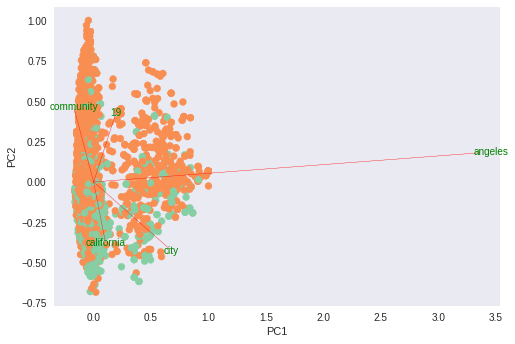

In [448]:
scaler = StandardScaler()
scaler.fit(tfidf_df)
X=scaler.transform(tfidf_df)

pca = PCA()
pca.fit(X,y_train)
x_new = pca.transform(X)   

def myplot(score,coeff,n,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    

    plt.scatter(xs/max(xs) ,ys/max(ys), c = cmap(norm(z))) #with scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*5, coeff[i,1]*5,color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 5.15, coeff[i,1] * 5.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(x_new[:,0:2], pca.components_.T, 5, labels=dat.columns.values) 
plt.show()